In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [93]:
df=pd.read_csv('D:/Downloads/Week/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [94]:
df=df.drop('CustomerID',axis=1)

In [95]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [96]:
df.shape

(200, 4)

In [97]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [98]:
df.duplicated().sum()

np.int64(0)

In [99]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', drop_first=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7260\2848986826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


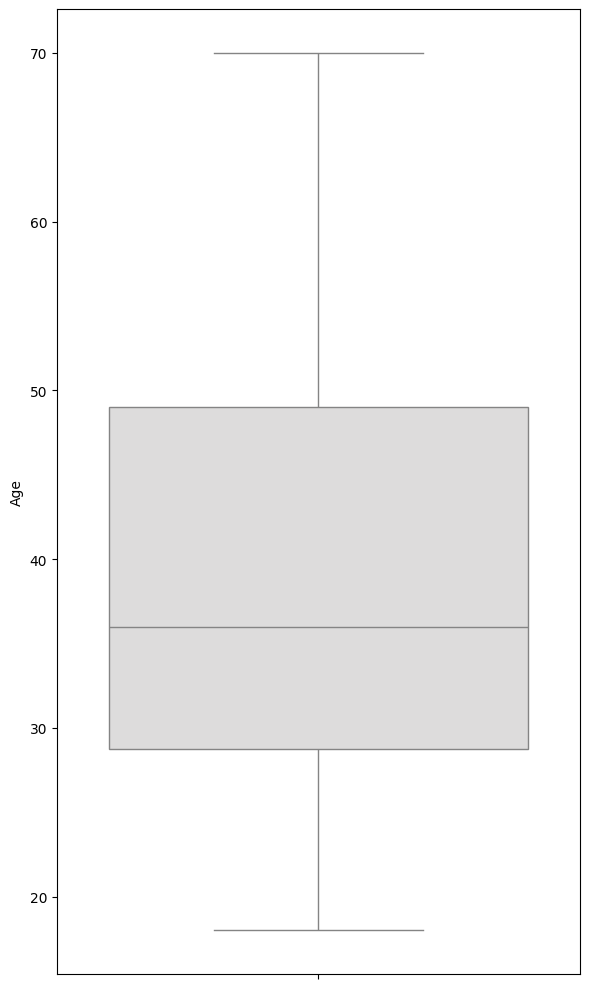

C:\Users\Dell\AppData\Local\Temp\ipykernel_7260\2848986826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


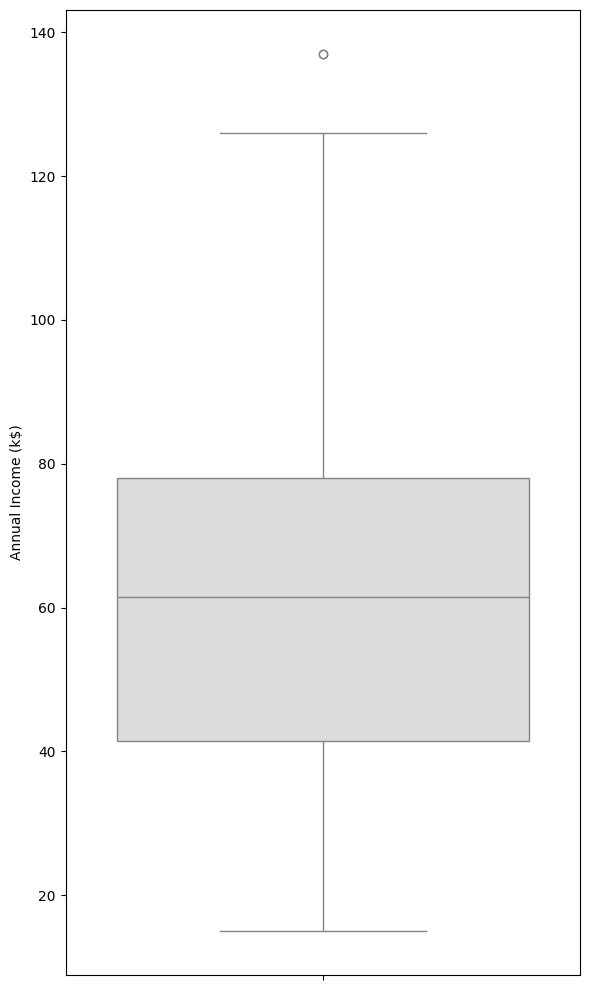

C:\Users\Dell\AppData\Local\Temp\ipykernel_7260\2848986826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


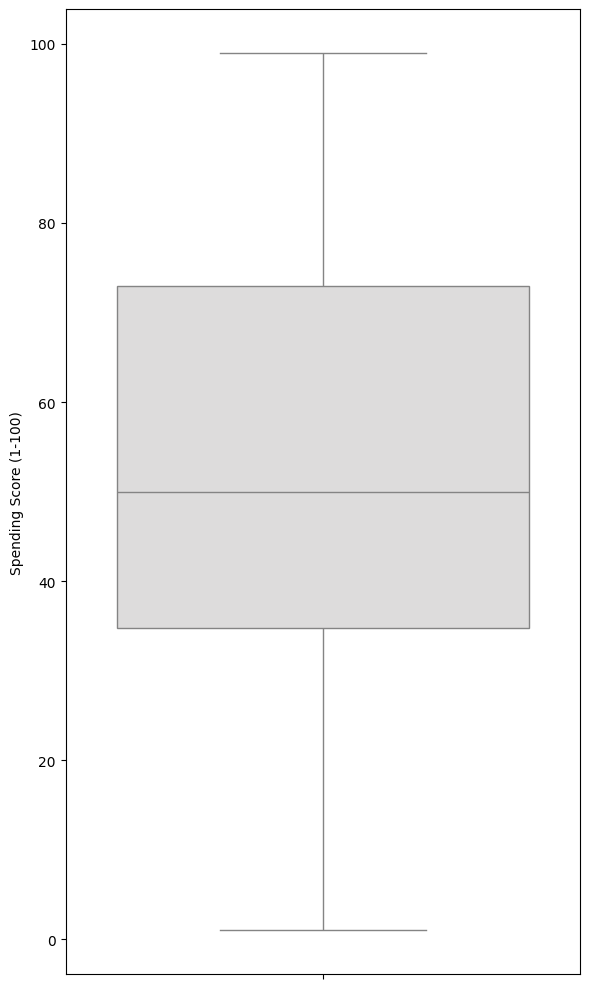

In [100]:

columns = ['Age','Annual Income (k$)','Spending Score (1-100)']




for feature in columns:
    plt.figure(figsize=(6, 10))
    sns.boxplot( y=df[feature], palette=("coolwarm"))
    plt.tight_layout()
    plt.show()

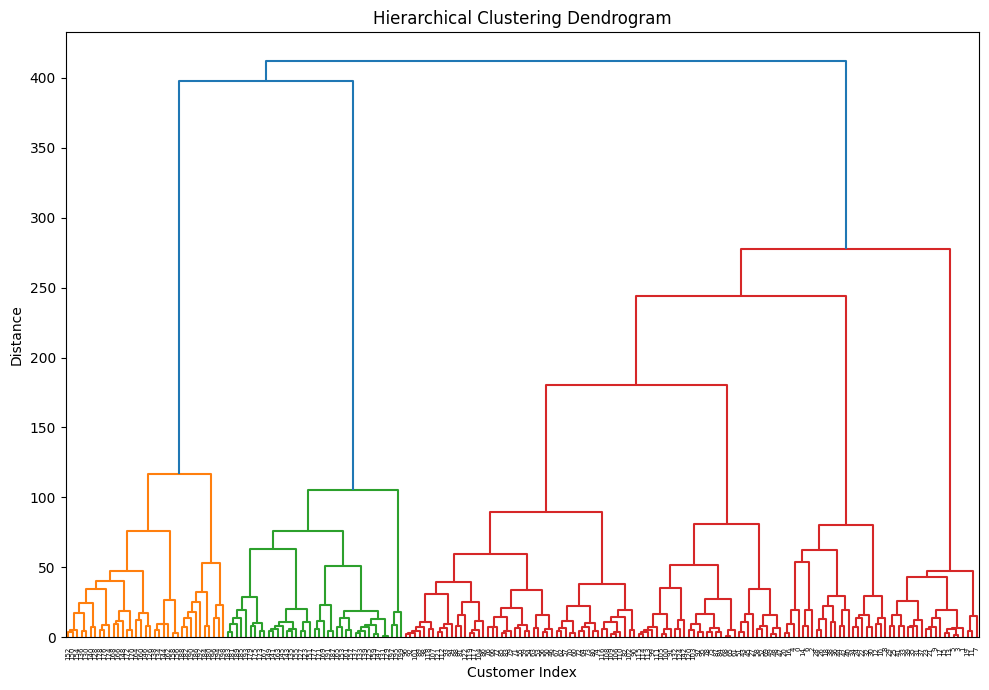

In [101]:

scalar=StandardScaler()
df_scaled=scalar.fit_transform(df)
linked = linkage(df, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

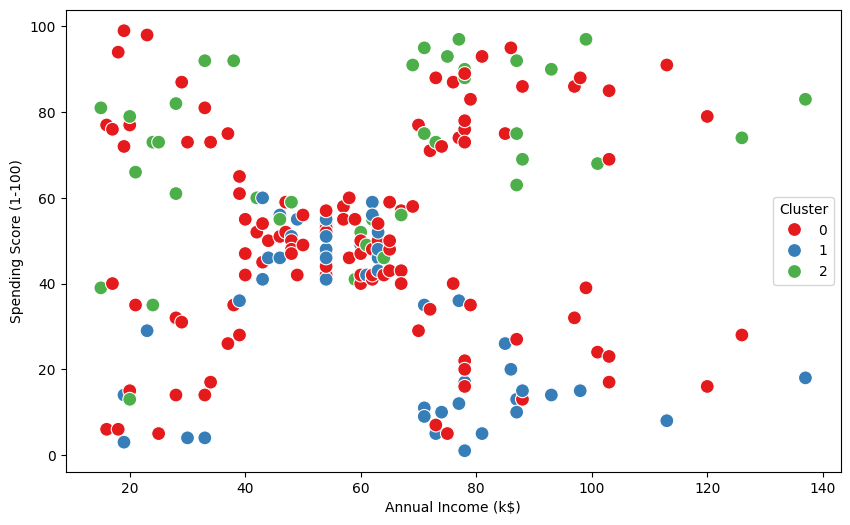

In [105]:
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Cluster'] = agg_clustering.fit_predict(df_scaled)

# Step 4: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=100
)

In [106]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,19,15,39,False,True,2
1,21,15,81,False,True,2
2,20,16,6,True,False,0
3,23,16,77,True,False,0
4,31,17,40,True,False,0


In [107]:
cluster_profiles = df.groupby('Cluster').agg({
    'Age': ['mean', 'median'],
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median'],
    
})
print(cluster_profiles)

               Age        Annual Income (k$)        Spending Score (1-100)  \
              mean median               mean median                   mean   
Cluster                                                                      
0        38.098214   35.0          59.250000   60.0              51.526786   
1        49.765957   49.0          63.957447   63.0              29.978723   
2        28.390244   28.0          60.243902   62.0              69.756098   

                
        median  
Cluster         
0         50.0  
1         35.0  
2         73.0  


In [108]:
label_map = {
    0: 'Adult People - Medium Income -High Spending',
    1: 'Senior People- Medium Income -Less Spending',
    2: 'Young People - Medium Income - High Spending',
  
}
df['cluster_label'] = df['Cluster'].map(label_map)


In [109]:
df['cluster_label'].unique()

array(['Young People - Medium Income - High Spending',
       'Adult People - Medium Income -High Spending',
       'Senior People- Medium Income -Less Spending'], dtype=object)

In [110]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score

In [117]:
X = df.drop(['Cluster', 'cluster_label'], axis=1)
y = df[['Cluster']]


In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline


In [125]:
pipeline={
    'KNN':Pipeline([
    
        ('classifier',KNeighborsClassifier())
    ]),
    'Decsion tree':Pipeline([
 
        ('classifier',DecisionTreeClassifier(max_depth=5,random_state=42, splitter='random',criterion='entropy'))
    
    ]),
    'Naive Byes':Pipeline([
       
        ('classifier',GaussianNB(var_smoothing=1e-8))
    ])
}

In [121]:

from sklearn.model_selection import GridSearchCV



param_grids = {
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    'Decsion tree': {
        'classifier__max_depth': [3, 5, 10],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__splitter': ['best', 'random']
    },
    'Naive Byes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    }
}

In [126]:
results=[]
for name in pipeline:
    grid = GridSearchCV(pipeline[name], param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_model.predict(X_test))
    cv_acc = grid.best_score_
    
    results.append((name, train_acc, test_acc, cv_acc, grid.best_params_))

# Create a result DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy", "CV Accuracy", "Best Params"])
results_df.sort_values(by="CV Accuracy", ascending=False, inplace=True)

print(results_df)

d:\Downloads\Week\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


          Model  Train Accuracy  Test Accuracy  CV Accuracy  \
2    Naive Byes         0.98125          1.000      0.97500   
1  Decsion tree         0.99375          1.000      0.96875   
0           KNN         0.65000          0.575      0.56875   

                                         Best Params  
2               {'classifier__var_smoothing': 1e-09}  
1  {'classifier__criterion': 'entropy', 'classifi...  
0  {'classifier__n_neighbors': 9, 'classifier__we...  


d:\Downloads\Week\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
